## Edge detection

In [1]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

__Read image__


In [2]:
fname = os.path.join("..","data","img","coins.png")

In [4]:
image = cv2.imread(fname)

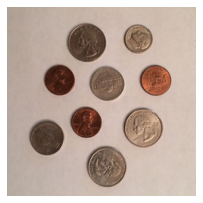

In [5]:
jimshow(image)

__Make greyscale__

In [7]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

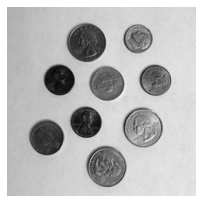

In [8]:
jimshow_channel(grey_image)

## Sobel Operators

In [9]:
# We want two kernels (one x and one y)

sobelX = cv2.Sobel(grey_image, cv2.CV_64F, 1, 0) #horizontal kernel
sobelY = cv2.Sobel(grey_image, cv2.CV_64F, 0, 1) #vertical kernel

Absolute takes the integer despite negative or positive
Example:
- -5 = 5 

In [11]:
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

In [12]:
sobel_edges = np.hstack([sobelX, sobelY])

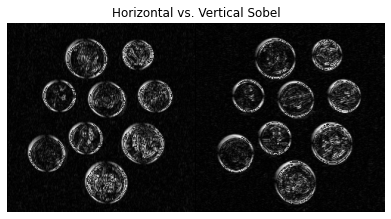

In [14]:
jimshow_channel(sobel_edges, "Horizontal vs. Vertical Sobel")

As we can see the top and bottom has less edge with the horizontal and vice versa with the left and right on the vertical

## Combined Sobel

In [22]:
sobel_combined = cv2.bitwise_or(sobelX, sobelY)

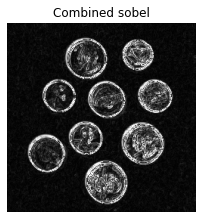

In [23]:
jimshow_channel(sobel_combined, "Combined sobel")

Here we can see all the points together meaning we have combined the horizontal and vertical greyscale which is much more nuanced

## Laplacian

In [24]:
laplace = cv2.Laplacian(grey_image, cv2.CV_64F)

In [25]:
laplace = np.uint8(np.absolute(laplace))

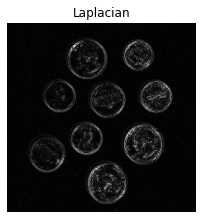

In [27]:
jimshow_channel(laplace, "Laplacian")

## Canny edge detection

In [28]:
blurred = cv2.GaussianBlur(grey_image, (5,5), 0)

In [35]:
canny = cv2.Canny(blurred, 30, 150)

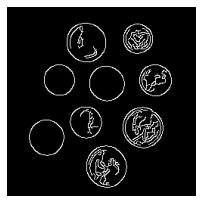

In [36]:
jimshow_channel(canny)

As we can see we have gone even further in edging the image.

## Find contours

In [40]:
(contours, _) = cv2.findContours(canny.copy(),
                    cv2.RETR_EXTERNAL, #filtering internal structures hieararchially
                    cv2.CHAIN_APPROX_SIMPLE)

In [42]:
contours

[array([[[129, 183]],
 
        [[128, 184]],
 
        [[123, 184]],
 
        [[122, 185]],
 
        [[120, 185]],
 
        [[119, 186]],
 
        [[118, 186]],
 
        [[116, 188]],
 
        [[115, 188]],
 
        [[110, 193]],
 
        [[110, 194]],
 
        [[108, 196]],
 
        [[108, 197]],
 
        [[107, 198]],
 
        [[107, 200]],
 
        [[106, 201]],
 
        [[106, 203]],
 
        [[105, 204]],
 
        [[105, 217]],
 
        [[106, 218]],
 
        [[106, 220]],
 
        [[107, 221]],
 
        [[107, 222]],
 
        [[108, 223]],
 
        [[108, 224]],
 
        [[110, 226]],
 
        [[110, 227]],
 
        [[116, 233]],
 
        [[117, 233]],
 
        [[119, 235]],
 
        [[120, 235]],
 
        [[121, 236]],
 
        [[123, 236]],
 
        [[124, 237]],
 
        [[128, 237]],
 
        [[129, 238]],
 
        [[136, 238]],
 
        [[137, 237]],
 
        [[140, 237]],
 
        [[141, 236]],
 
        [[143, 236]],
 
        [[145, 2

## Drawing contours

```cv2.drawContours(image, contours, fill, colour, thickness)```

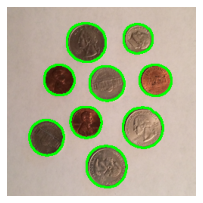

In [52]:
jimshow(cv2.drawContours(image.copy(), # draw contours on original
                        contours,      # our list of contours
                        -1,            # which contours to draw
                        (0,255,0),     # contour color
                        2))            # contour pixel width

Here we can change the parametres. The "-1" makes all get the contour but if you were to put in 1-9 you can choose specific coins (bottom to top). 
The same goes for colour and the width that can be adjusted. 

In [54]:
list(contours)

[array([[[129, 183]],
 
        [[128, 184]],
 
        [[123, 184]],
 
        [[122, 185]],
 
        [[120, 185]],
 
        [[119, 186]],
 
        [[118, 186]],
 
        [[116, 188]],
 
        [[115, 188]],
 
        [[110, 193]],
 
        [[110, 194]],
 
        [[108, 196]],
 
        [[108, 197]],
 
        [[107, 198]],
 
        [[107, 200]],
 
        [[106, 201]],
 
        [[106, 203]],
 
        [[105, 204]],
 
        [[105, 217]],
 
        [[106, 218]],
 
        [[106, 220]],
 
        [[107, 221]],
 
        [[107, 222]],
 
        [[108, 223]],
 
        [[108, 224]],
 
        [[110, 226]],
 
        [[110, 227]],
 
        [[116, 233]],
 
        [[117, 233]],
 
        [[119, 235]],
 
        [[120, 235]],
 
        [[121, 236]],
 
        [[123, 236]],
 
        [[124, 237]],
 
        [[128, 237]],
 
        [[129, 238]],
 
        [[136, 238]],
 
        [[137, 237]],
 
        [[140, 237]],
 
        [[141, 236]],
 
        [[143, 236]],
 
        [[145, 2

In [55]:
len(contours)

9

In [59]:
print(f"I can count {len(contours)} coint in the image!")

I can count 9 coint in the image!
